<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine-Learning-End_to_end_project/blob/main/Softmax_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [112]:
df=pd.read_csv("/content/archive (14).zip")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
125,7.2,3.2,6.0,1.8,virginica
54,6.5,2.8,4.6,1.5,versicolor
138,6.0,3.0,4.8,1.8,virginica
110,6.5,3.2,5.1,2.0,virginica
79,5.7,2.6,3.5,1.0,versicolor


In [113]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [114]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [115]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
51,6.4,3.2,4.5,1.5,1
119,6.0,2.2,5.0,1.5,2
24,4.8,3.4,1.9,0.2,0
109,7.2,3.6,6.1,2.5,2


In [116]:
original_species = le.inverse_transform([0, 1, 2])
print("Mapping of encoded numbers to original species:")
for i, species_name in enumerate(original_species):
    print(f"{i}: {species_name}")

Mapping of encoded numbers to original species:
0: setosa
1: versicolor
2: virginica


In [117]:
df=df[['sepal_length','petal_length','species']]
df.sample(5)

,sepal_length,petal_length,species
58,6.6,4.6,1
68,6.2,4.5,1
35,5.0,1.2,0
91,6.1,4.6,1
127,6.1,4.9,2


In [118]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('species',axis=1),df['species'],test_size=0.2,random_state=42)

In [119]:
clf=LogisticRegression()

In [120]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [121]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [122]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [123]:

original_species = le.inverse_transform([0, 1, 2])
print("Mapping of encoded numbers to original species:")
for i, species_name in enumerate(original_species):
    print(f"{i}: {species_name}")

Mapping of encoded numbers to original species:
0: setosa
1: versicolor
2: virginica


In [124]:
query_data = pd.DataFrame({
    'sepal_length': [5.1],

    'petal_length': [1.4]
})
clf.predict_proba(query_data)

array([[9.69462382e-01, 3.05374021e-02, 2.15953438e-07]])

In [125]:
!pip install mlxtend

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


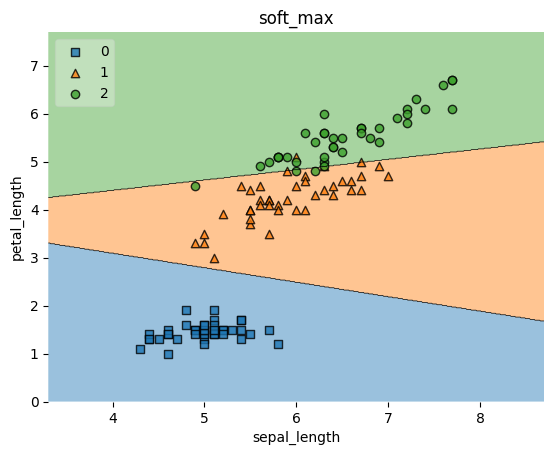

In [126]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train.values, y_train.values, clf=clf, legend=2)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('soft_max')
plt.show()